In [1]:
pip install matplotlib pandas datasets[vision]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 46.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 59.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 4.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 8.3 MB/s 

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datasets

def set_plt_params(SCALE):
    plt.rcParams.update(
        {
            "text.usetex": False,
            "mathtext.fontset": "cm",
            "axes.unicode_minus": False,
            "axes.labelsize": 9 * SCALE,
            "xtick.labelsize": 9 * SCALE,
            "ytick.labelsize": 9 * SCALE,
            "legend.fontsize": 9 * SCALE,
            "axes.titlesize": 10 * SCALE,
            "figure.titlesize": 10.5 * SCALE,
            "figure.labelsize": 10.5 * SCALE,
            "axes.linewidth": 1,
            'font.family': 'serif',
            'font.serif': ['Times New Roman', 'Times', 'serif']
        }
    )

matplotlib.matplotlib_fname()

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# this was faster than loading the dataset again..

# create full dataset with all splits
wikiart_train = datasets.load_from_disk('../datasets/WikiArt_train')
wikiart_test = datasets.load_from_disk('../datasets/WikiArt_test')
wikiart_val = datasets.load_from_disk('../datasets/WikiArt_val')

train_dict = {'genre': wikiart_train['genre'],
                'style': wikiart_train['style'],
                'artist': wikiart_train['artist']}
train_df = pd.DataFrame(train_dict)

test_dict = {'genre': wikiart_test['genre'],
                'style': wikiart_test['style'],
                'artist': wikiart_test['artist']}
test_df = pd.DataFrame(test_dict)

val_dict = {'genre': wikiart_val['genre'],
                'style': wikiart_val['style'],
                'artist': wikiart_val['artist']}
val_df = pd.DataFrame(val_dict)

wikiart = pd.concat([train_df, test_df, val_df])

Loading dataset from disk:   0%|          | 0/55 [00:00<?, ?it/s]

In [5]:
# create genre mapping dict with nicer formatted labels
genre_mapping = {0: 'Abstract Painting',
1: 'Cityscape',
2: 'Genre Painting',
3: 'Illustration',
4: 'Landscape',
5: 'Nude Painting',
6: 'Portrait',
7: 'Religious Painting',
8: 'Sketch and Study',
9: 'Still Life',
10: 'Unknown Genre'}

In [6]:
# create style mapping dict with nicer formatted labels
style_mapping = {0: 'Abstract Expressionism',
1: 'Action Painting',
2: 'Analytical Cubism',
3: 'Art Nouveau',
4: 'Baroque',
5: 'Color Field Painting',
6: 'Contemporary Realism',
7: 'Cubism',
8: 'Early Renaissance',
9: 'Expressionism',
10: 'Fauvism',
11: 'High Renaissance',
12: 'Impressionism',
13: 'Mannerism Late Renaissance',
14: 'Minimalism',
15: 'Naive Art Primitivism',
16: 'New Realism',
17: 'Northern Renaissance',
18: 'Pointillism',
19: 'Pop Art',
20: 'Post Impressionism',
21: 'Realism',
22: 'Rococo',
23: 'Romanticism',
24: 'Symbolism',
25: 'Synthetic Cubism',
26: 'Ukiyo e'}

In [7]:
wikiart['genre_label'] = wikiart['genre'].map(genre_mapping)
wikiart['style_label'] = wikiart['style'].map(style_mapping)
# wikiart['artist_label'] = wikiart['artist'].map(artist_mapped_labels)

In [52]:
plt.rcParams.update({
    'text.usetex': False,
    "font.family": "serif",
})

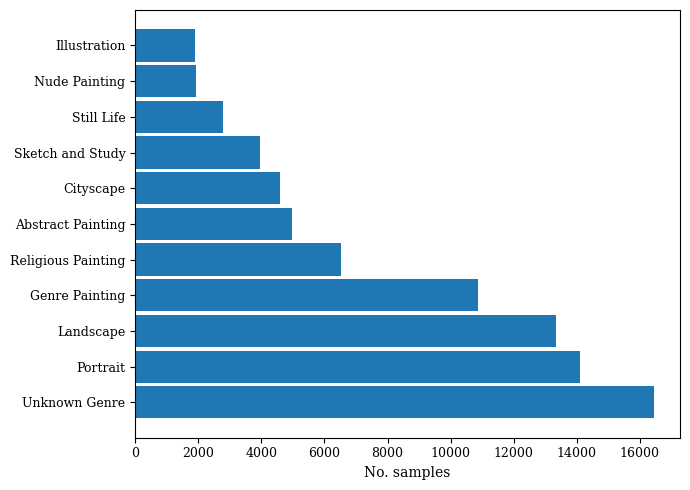

In [55]:
genre_counts = wikiart['genre_label'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
plt.barh(genre_counts['genre_label'], genre_counts['count'], align='center', height=0.9)
plt.tick_params(labelsize=9)
plt.xlabel('No. samples')
plt.tight_layout()
plt.savefig('genre_dist.png')

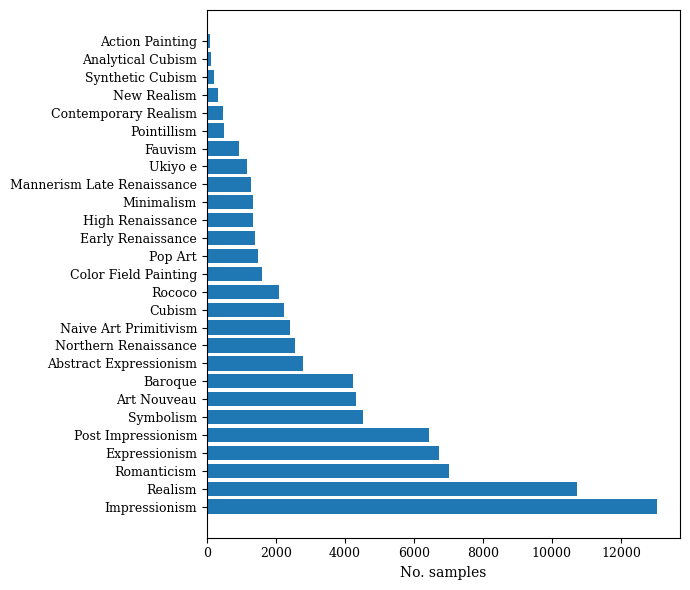

In [57]:
#style
style_counts = wikiart['style_label'].value_counts().reset_index()

plt.figure(figsize=(7, 6))
plt.barh(style_counts['style_label'], style_counts['count'])
plt.tick_params(labelsize=9)
plt.xlabel('No. samples')
plt.tight_layout()
plt.savefig('style_dist.png')

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont

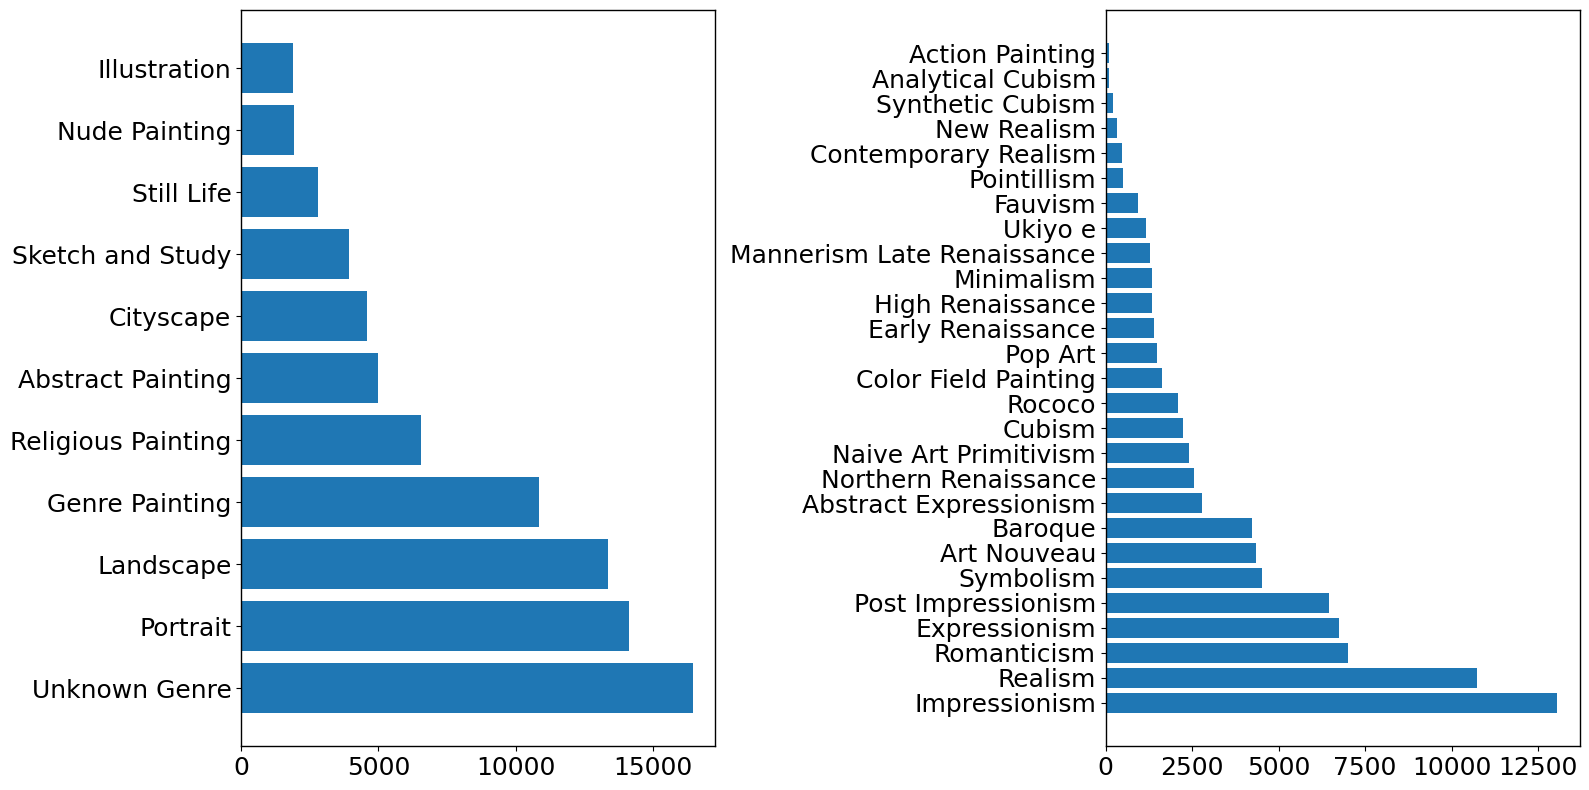

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, serif
findfont

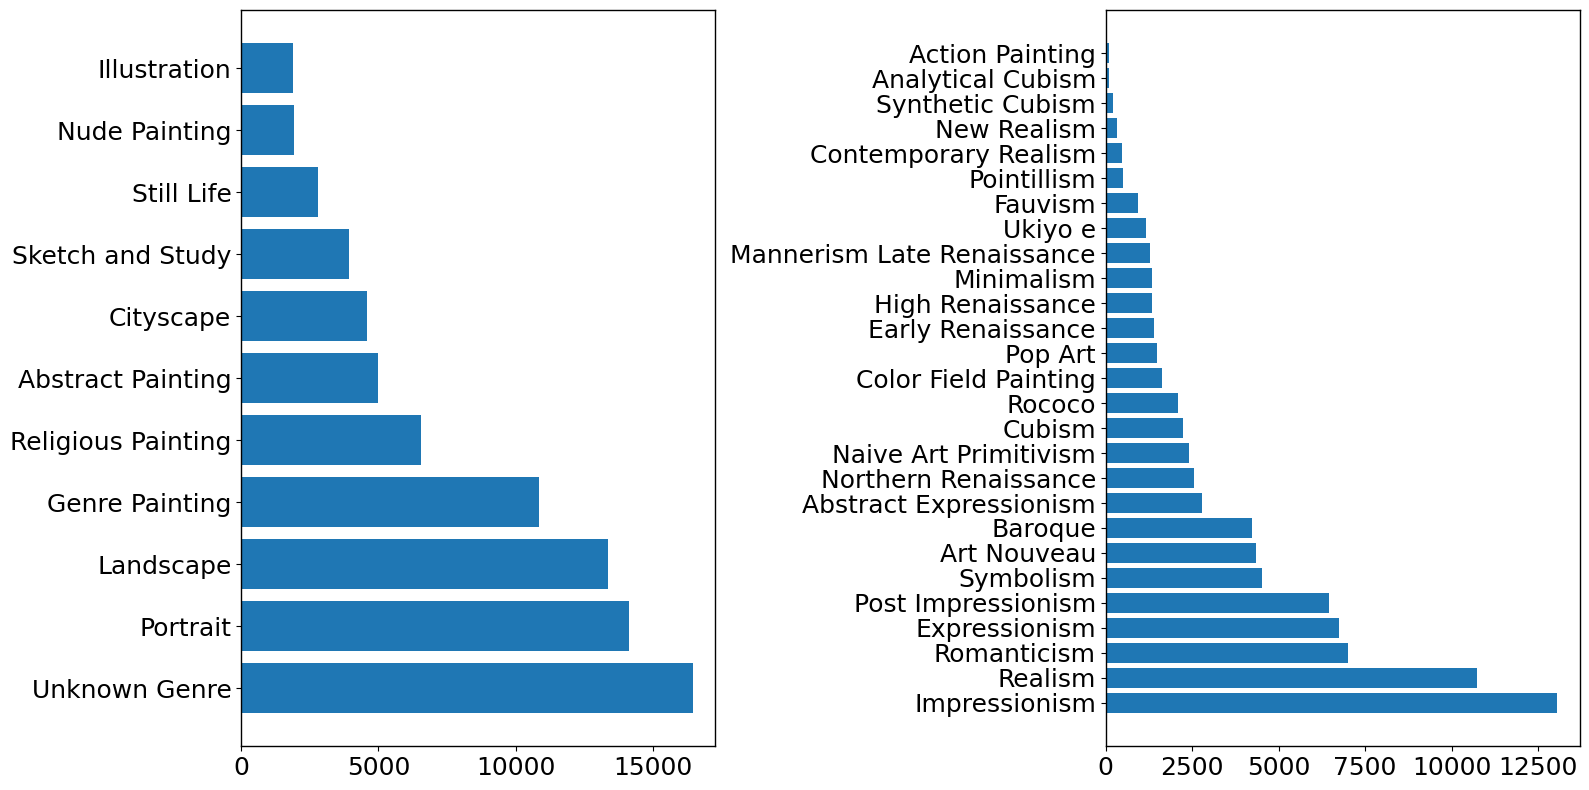

In [8]:
def label_plot_A():
    set_plt_params(SCALE=2)

    fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
    axs[0].barh(genre_counts['genre_label'], genre_counts['count'])
    axs[1].barh(style_counts['style_label'], style_counts['count'])

    plt.tight_layout()
    return fig

label_plot_A()

In [9]:
big_artists = wikiart['artist_label'].value_counts().reset_index()[0:5]
smaller_artist = wikiart['artist_label'].value_counts().reset_index()[5:].reset_index()
smaller_artist['count'].sum()

KeyError: 'artist_label'

In [ ]:
big_artists.loc[len(big_artists.index)] = ['Artists with fewer than 1000 samples', 33088] 
artists_labels = ['Unknown Artist', 'Vincent van Gogh', 'Nicholas Roerich', 'Pierre Auguste Renoir', 'Claude Monet', 'Artists with fewer than 1000 samples']

In [ ]:
plt.figure(figsize=(7, 3))
plt.barh(artists_labels, big_artists['count'], align='center', height=0.4)
#plt.ylabel('Artist')
plt.tick_params(labelsize=9)
plt.xlabel('No. samples')
plt.tight_layout()